In [ ]:
# Lab Assignment 6: Word Embeddings with word2vec
# •	Train a word2vec model on a small corpus using Gensim.
# •	Visualize word embeddings using t-SNE.
# •	Find similar words using cosine similarity.

In [ ]:
# Step 1: Install required libraries
# Reinstall compatible versions to avoid dtype mismatch
!pip install numpy==1.23.5 --quiet
!pip install --upgrade --force-reinstall gensim --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.1 requires

In [ ]:
# Step 2: Import necessary modules
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re

In [ ]:
# Step 3: Sample text corpus (you can replace it with your own)
corpus = """
Natural language processing enables machines to understand and interpret human language.
It involves various tasks like sentiment analysis, named entity recognition, and machine translation.
Deep learning has significantly improved NLP by using models like transformers and word embeddings.
Word2Vec is an efficient model to learn vector representations of words based on context.
"""

In [ ]:
# Step 4: Preprocess text
nltk.download('punkt_tab')
sentences = sent_tokenize(corpus.lower())
tokenized_sentences = [word_tokenize(re.sub(r'[^\w\s]', '', sent)) for sent in sentences]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Step 5: Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=2, sg=1)  # sg=1 = skip-gram

In [ ]:
# Step 6: Explore vocabulary
print("Vocabulary:", list(model.wv.key_to_index.keys()))

Vocabulary: ['and', 'language', 'to', 'like', 'context', 'various', 'machine', 'recognition', 'entity', 'named', 'analysis', 'sentiment', 'tasks', 'it', 'involves', 'deep', 'human', 'interpret', 'understand', 'machines', 'enables', 'processing', 'translation', 'learning', 'on', 'is', 'based', 'words', 'of', 'representations', 'vector', 'learn', 'model', 'efficient', 'an', 'word2vec', 'has', 'embeddings', 'word', 'transformers', 'models', 'using', 'by', 'nlp', 'improved', 'significantly', 'natural']


In [ ]:
# Step 7: Find similar words
word = 'language'
print(f"\nWords similar to '{word}':")
print(model.wv.most_similar(word))


Words similar to 'language':
[('words', 0.1886485069990158), ('translation', 0.188398540019989), ('involves', 0.16068394482135773), ('understand', 0.15915194153785706), ('it', 0.13707822561264038), ('learning', 0.12792719900608063), ('deep', 0.12288650125265121), ('models', 0.11734623461961746), ('word', 0.0945146307349205), ('interpret', 0.08548206090927124)]


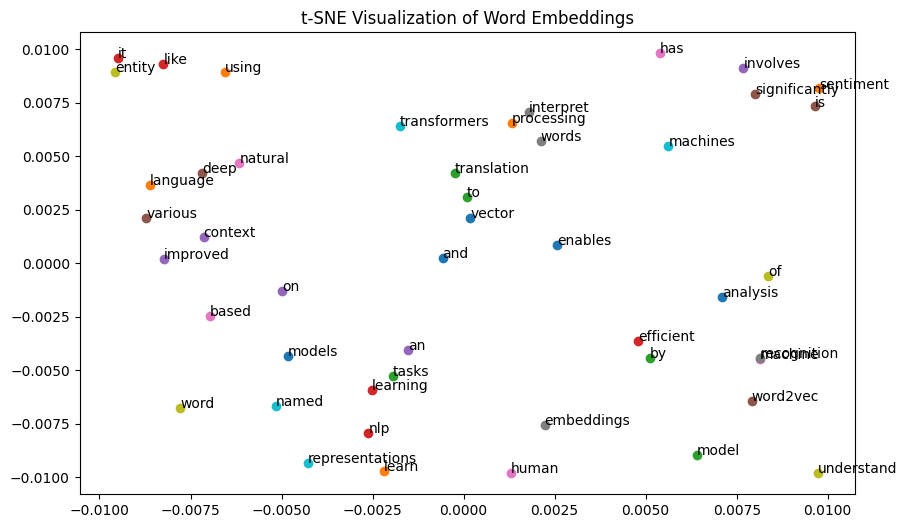

In [ ]:
# Step 8: Visualize embeddings using t-SNE
import numpy as np
def visualize_embeddings(model):
    words = list(model.wv.key_to_index.keys())
    word_vectors = [model.wv[word] for word in words]

    tsne = TSNE(n_components=2, random_state=0)
    reduced_vectors = np.array([model.wv[word] for word in words])

    plt.figure(figsize=(10, 6))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.show()

visualize_embeddings(model)